In [1]:
import pandas as pd
import sys, os
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

%load_ext autoreload
%autoreload 2
sys.path.insert(0, os.path.abspath('..'))

from src.data import preprocessor
from src.models import topic_modeling as tm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\11941\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\11941\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Load Russian Tweets Data and Prep it for Gensim LDA

In [2]:
df = pd.read_csv('../data/interim/russian_tweets_translated.csv')
corpus, id2word, texts = preprocessor.gensim_lda_prep(df)

#### Coherence Value vs # of Topics

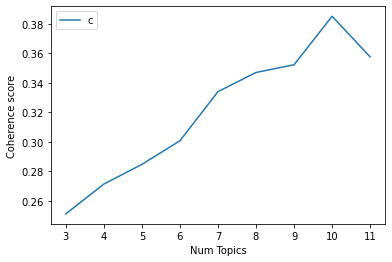

In [3]:
model_list, coherence_values = tm.compute_coherence_values(dictionary=id2word, corpus=corpus, id2word=id2word, texts=texts, start=3, limit=12, step=1)

x = range(3, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [4]:
coherence_values

[0.2511961604640702,
 0.27142294825335944,
 0.284781951914542,
 0.30078277119108715,
 0.33411478992245236,
 0.34710182377182036,
 0.3523493162836812,
 0.3852324931230161,
 0.3576593987586895]

#### Load Model with the Highest Coherence Score and Visualize

In [5]:
lda_model = model_list[7]
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, id2word)

C:\Users\11941\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.100142  0.108146       1        1  17.900856
6     -0.127171 -0.022887       2        1  16.252035
7     -0.144960 -0.101532       3        1  11.505656
0      0.030171  0.149672       4        1   9.604204
8     -0.040000 -0.133783       5        1   9.393794
4      0.027271  0.073443       6        1   9.035076
1     -0.054382 -0.000936       7        1   8.556874
3      0.052087  0.060034       8        1   7.281275
9      0.152370 -0.099520       9        1   5.807093
5      0.204755 -0.032637      10        1   4.663137, topic_info=              Term         Freq        Total Category  logprob  loglift
7          ukraine  4033.000000  4033.000000  Default  30.0000  30.0000
28         russian  2380.000000  2380.000000  Default  29.0000  29.0000
206         odessa   282.000000   282.000000  Default  28.0000  28.0000
679       occupier   375.000000   375.000000  Default  27.0000  27.0000
3252  putinstopwar   249.000000   249.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
424           read    36.538757   123.969430  Topic10  -4.7480   1.8438
591        company    29.082023    60.943789  Topic10  -4.9762   2.3257
35              co    58.965144   922.420270  Topic10  -4.2694   0.3154
673         medium    27.770747    81.042246  Topic10  -5.0224   1.9945
93         already    30.378879   256.786279  Topic10  -4.9326   0.9310

[652 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4940      3  0.965094    accident
1387      2  0.924977    activity
3716      4  0.973279      actual
4067      9  0.937491  additional
2459      4  0.895749     address
...     ...       ...         ...
582       6  0.150130   yesterday
582       7  0.075065   yesterday
1151      1  0.045973     youtube
1151      4  0.942454     youtube
5415      8  0.943138       ウクライナ

[1734 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 8, 1, 9, 5, 2, 4, 10, 6])

#### Print All Topics

In [6]:
for topic_id in range(lda_model.num_topics):
    topk = lda_model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: russian fascist come shoot work national central loss home soon
1: ukraine commander russian lose people division war get go ready
2: russian ukraine people war child mariupol stop invader kill country
3: odessa ukraine people music month hand life help insult wonder
4: war ukraine putinstopwar co intelligence know people ukrainian together unfortunately
5: victory time crimea long co word spend celebrate catastrophe first
6: ukraine russian news war ukrainian donetsk photo loss region co
7: russian ukraine destroy tank occupier force ukrainian invader russiaukrainwar military
8: ukraine world russian war co occupation broadcast television watch explosion
9: co regiment beautiful ukraine today https export anti modern still


#### Get Perplexity

In [7]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.994133996153511

Coherence Score:  0.3852324931230161
